In [193]:
import numpy as np
import pandas as pd

In [194]:
data = pd.read_csv("loan-train.csv")

In [195]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [196]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data Preprocessing

In [197]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [198]:
data = data.dropna()

In [199]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [200]:
zero_counts = (data[['Gender','Married','Education','Self_Employed','LoanAmount','Loan_Amount_Term','Property_Area']] == 0).sum()
print(zero_counts)

Gender              0
Married             0
Education           0
Self_Employed       0
LoanAmount          0
Loan_Amount_Term    0
Property_Area       0
dtype: int64


Loan_ID is of no use for our analysis so we delete it

In [201]:
data = data.drop(columns='Loan_ID')

In [202]:
data['Credit_History'].value_counts()

Credit_History
1.0    410
0.0     70
Name: count, dtype: int64

In [203]:
mapping = {'Y':1,'N':0}
data['Loan_Status'] =data['Loan_Status'].map(mapping)

In [204]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 480 entries, 1 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             480 non-null    object 
 1   Married            480 non-null    object 
 2   Dependents         480 non-null    object 
 3   Education          480 non-null    object 
 4   Self_Employed      480 non-null    object 
 5   ApplicantIncome    480 non-null    int64  
 6   CoapplicantIncome  480 non-null    float64
 7   LoanAmount         480 non-null    float64
 8   Loan_Amount_Term   480 non-null    float64
 9   Credit_History     480 non-null    float64
 10  Property_Area      480 non-null    object 
 11  Loan_Status        480 non-null    int64  
dtypes: float64(4), int64(2), object(6)
memory usage: 48.8+ KB


In [205]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


Data Visualisation

Classification based on Dependents


In [206]:
dep = data[data['Loan_Status']== 1]['Dependents'].value_counts()
print(dep)

Dependents
0     187
2      65
1      52
3+     28
Name: count, dtype: int64


In [207]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Dependents Distribution for Approved Loans')

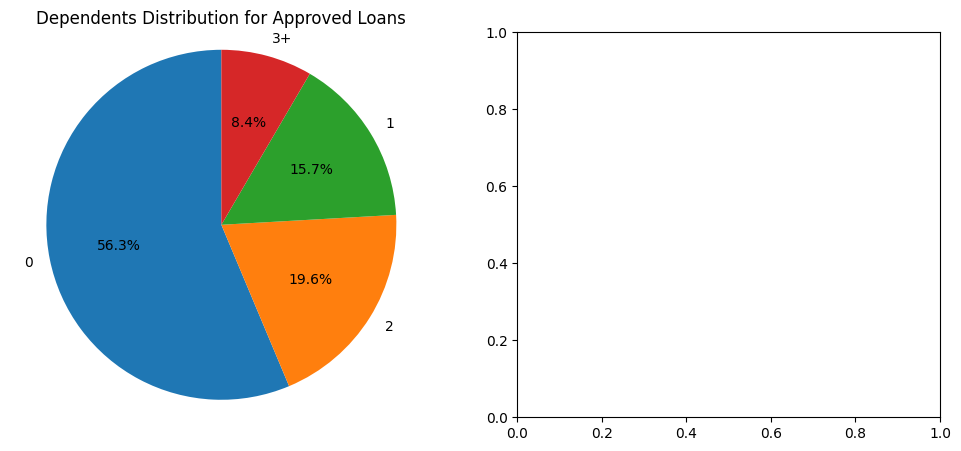

In [208]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pie(dep, labels=dep.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
ax1.set_title('Dependents Distribution for Approved Loans')

On basis of Property Area

In [209]:
propa = data[data['Loan_Status']== 1]['Property_Area'].value_counts()
print(propa)

Property_Area
Semiurban    149
Urban         98
Rural         85
Name: count, dtype: int64


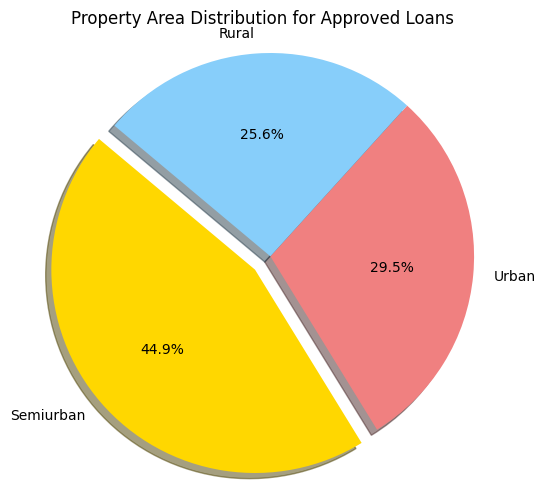

In [210]:
labels = propa.index
sizes = propa.values
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)  # Explode the 1st slice
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Property Area Distribution for Approved Loans')
plt.show()

On basis of Applicant Income

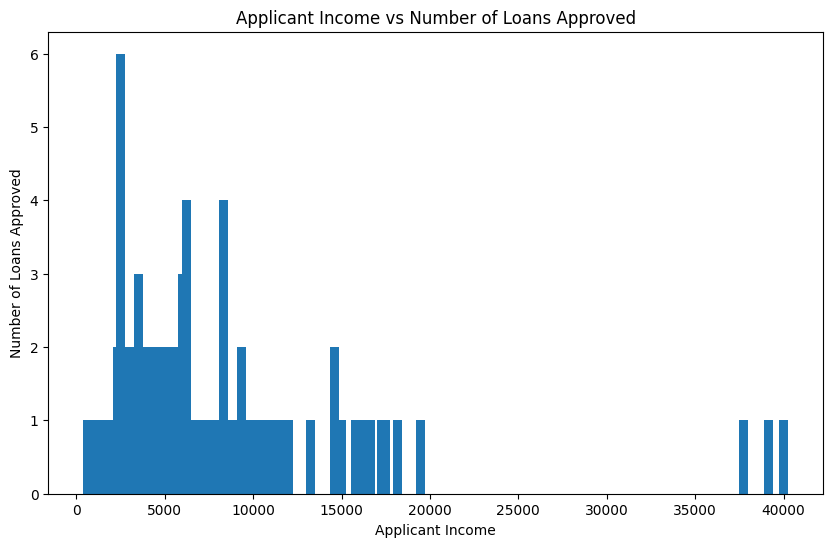

In [211]:
appinc = data[data['Loan_Status'] == 1]['ApplicantIncome'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(appinc.index, appinc.values, width=500)
plt.xlabel('Applicant Income')
plt.ylabel('Number of Loans Approved')
plt.title('Applicant Income vs Number of Loans Approved')
plt.show()

In [212]:
meaninc = data['ApplicantIncome'].mean()
print(meaninc)

5364.23125


This proves that most of the loans were provided to those who have salary above mean salary

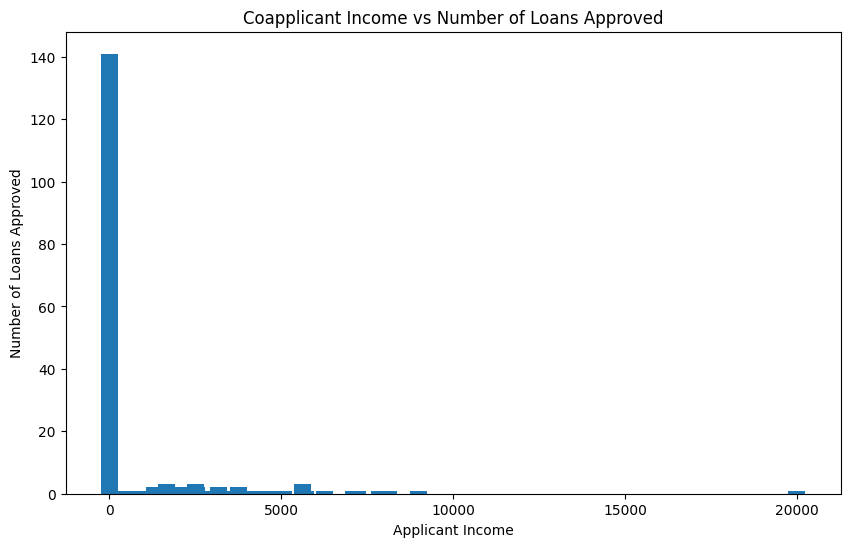

In [213]:
coappinc = data[data['Loan_Status'] == 1]['CoapplicantIncome'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(coappinc.index, coappinc.values, width=500)
plt.xlabel('Applicant Income')
plt.ylabel('Number of Loans Approved')
plt.title('Coapplicant Income vs Number of Loans Approved')
plt.show()

On basis of Employment

In [214]:
emp = data[data['Loan_Status']== 1]['Self_Employed'].value_counts()
print(emp)

Self_Employed
No     289
Yes     43
Name: count, dtype: int64


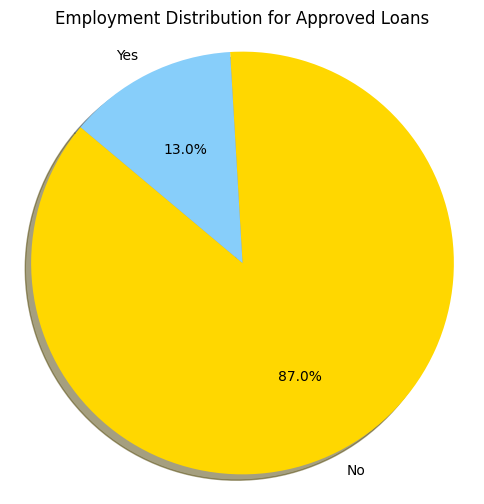

In [215]:
labels = emp.index
sizes = emp.values
colors = ['gold','lightskyblue']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Employment Distribution for Approved Loans')
plt.show()

 This proves that most loans were provided to people having some jobs 

On basis of Gender

In [216]:
gen = data[data['Loan_Status']== 1]['Gender'].value_counts()
print(gen)

Gender
Male      278
Female     54
Name: count, dtype: int64


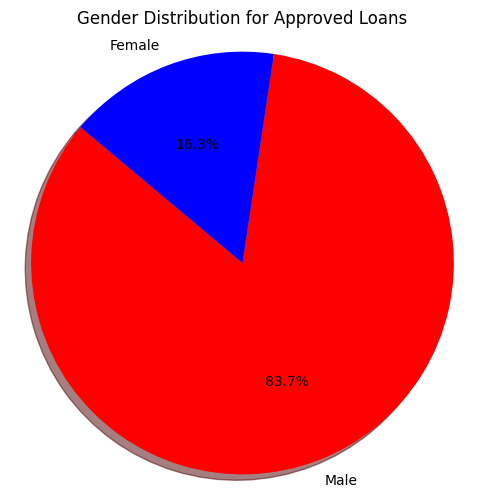

In [217]:
labels = gen.index
sizes = gen.values
colors = ['red','blue']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Gender Distribution for Approved Loans')
plt.show()

Gender Biasness still exists

On basis of Graduation

Education
Graduate        271
Not Graduate     61
Name: count, dtype: int64


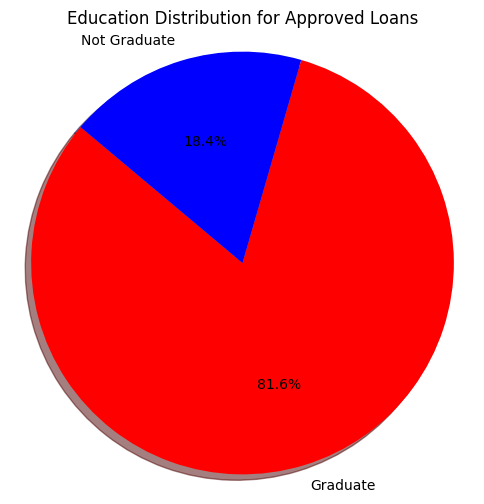

In [218]:
gre = data[data['Loan_Status']== 1]['Education'].value_counts()
print(gre)
labels = gre.index
sizes = gre.values
colors = ['red','blue']
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Education Distribution for Approved Loans')
plt.show()

Hence Education is important :)

In [219]:
data['Loan_Status'].value_counts()

Loan_Status
1    332
0    148
Name: count, dtype: int64

The Data is imbalanced it need to be balanced, so applying SMOTE 

In [220]:
from imblearn.over_sampling import SMOTE

In [221]:
import pandas as pd
data['Dependents'] = data['Dependents'].str.replace('3+', '3')


In [222]:
data['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
3     41
Name: count, dtype: int64

In [223]:
mapping = {'Rural':1, 'Semiurban':2,'Urban':3}
data['Property_Area'] = data['Property_Area'].map(mapping)

In [224]:
data['Property_Area'].value_counts()

Property_Area
2    191
3    150
1    139
Name: count, dtype: int64

In [225]:
data = pd.get_dummies(data, columns=['Gender', 'Married', 'Education', 'Self_Employed'], drop_first=True)
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

smote = SMOTE(sampling_strategy='auto', random_state=42)
Xresampled, yresampled = smote.fit_resample(X,y)

In [226]:
print(yresampled.value_counts())

Loan_Status
0    332
1    332
Name: count, dtype: int64


SVM

In [227]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(Xresampled, yresampled, test_size=0.2, random_state=42)


In [228]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [229]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)  
svm_model.fit(X_train, y_train)


SVC(kernel='linear')

In [230]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7368421052631579
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.49      0.65        65
           1       0.67      0.97      0.79        68

    accuracy                           0.74       133
   macro avg       0.80      0.73      0.72       133
weighted avg       0.80      0.74      0.72       133

Confusion Matrix:
[[32 33]
 [ 2 66]]


Random Forrest

In [231]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [232]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8345864661654135
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.82      0.83        65
           1       0.83      0.85      0.84        68

    accuracy                           0.83       133
   macro avg       0.83      0.83      0.83       133
weighted avg       0.83      0.83      0.83       133

Confusion Matrix:
[[53 12]
 [10 58]]


ANN

In [235]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.optimizers import Adam
import kerastuner as kt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score




Using TensorFlow backend


/tmp/ipykernel_2379/3753835903.py:5: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt


In [236]:
def build_model(hp):
    model = keras.Sequential()

    # Number of units in the first layer (tuned hyperparameter)
    hp_units1 = hp.Int('units1', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units1, activation='relu', input_dim=X_train.shape[1]))

    # Number of units in the second layer (tuned hyperparameter)
    hp_units2 = hp.Int('units2', min_value=32, max_value=256, step=32)
    model.add(Dense(units=hp_units2, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))

    # Learning rate (tuned hyperparameter)
    hp_learning_rate = hp.Choice('learning_rate', values=[0.001, 0.01, 0.1])

    model.compile(
        optimizer=Adam(learning_rate=hp_learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )

    return model

# Initialize the Keras Tuner Hyperband search
tuner = kt.Hyperband(
    build_model,
    objective='val_accuracy',
    max_epochs=20,
    factor=3,
    directory='my_tuner_dir',
    project_name='loan_approval'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=20, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(1)[0]


Trial 30 Complete [00h 00m 02s]
val_accuracy: 0.8130841255187988

Best val_accuracy So Far: 0.84112149477005
Total elapsed time: 00h 00m 40s


In [237]:
best_model.fit(X_train, y_train, epochs=20, validation_split=0.2)

# Make predictions on the test data
y_pred = (best_model.predict(X_test) > 0.5).astype("int32")

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Epoch 1/20
14/14 [==============================] - 1s 11ms/step - loss: 0.4836 - accuracy: 0.7618 - val_loss: 0.6508 - val_accuracy: 0.7196
Epoch 2/20
14/14 [==============================] - 0s 3ms/step - loss: 0.4715 - accuracy: 0.7618 - val_loss: 0.6488 - val_accuracy: 0.7477
Epoch 3/20
14/14 [==============================] - 0s 3ms/step - loss: 0.4472 - accuracy: 0.7807 - val_loss: 0.5716 - val_accuracy: 0.7664
Epoch 4/20
14/14 [==============================] - 0s 3ms/step - loss: 0.4299 - accuracy: 0.7995 - val_loss: 0.5544 - val_accuracy: 0.8411
Epoch 5/20
14/14 [==============================] - 0s 3ms/step - loss: 0.4189 - accuracy: 0.7925 - val_loss: 0.8668 - val_accuracy: 0.8037
Epoch 6/20
14/14 [==============================] - 0s 3ms/step - loss: 0.4375 - accuracy: 0.7925 - val_loss: 0.6003 - val_accuracy: 0.8224
Epoch 7/20
14/14 [==============================] - 0s 3ms/step - loss: 0.4104 - accuracy: 0.7948 - val_loss: 0.6252 - val_accuracy: 0.7944
Epoch 8/20
14/14 [=